In [42]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42

In [43]:
# dataset = Path('gestures_dataset_new.csv')
DATASET_CSV = Path('../gestures_dataset.csv')
DATASET_ROOT = Path('../ai_data/vgt-all')

UPLOADED_DATASET_CSV = Path('../uploaded_gestures_dataset.csv')
UPLOADED_DATASET_ROOT = Path('../ai_data/vgt-uploaded')

In [44]:
def handedness_data_from_directory_names(dataset_location: Path):
    handedness_data = {}
    for gesture_folder in os.listdir(dataset_location):
        gesture_name, handedness_string = gesture_folder.split('_')
        handedness_data[gesture_name] = (handedness_string[0] == '1', handedness_string[1] == '1')
    return handedness_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
belgië(0 -> 0)
bowlen(1 -> 1)
computer(2 -> 2)
duidelijk(3 -> 3)
fietsen(4 -> 4)
gebaar(5 -> 5)
geit(6 -> 6)
hallo(7 -> 7)
kameel(8 -> 8)
muis(9 -> 9)
tennis(10 -> 10)
verenigde staten(11 -> 11)
Something went wrong while processing usa - 2023-01-04_16-18-24.mp4: list index out of range
Dataset contain 12 gestures.


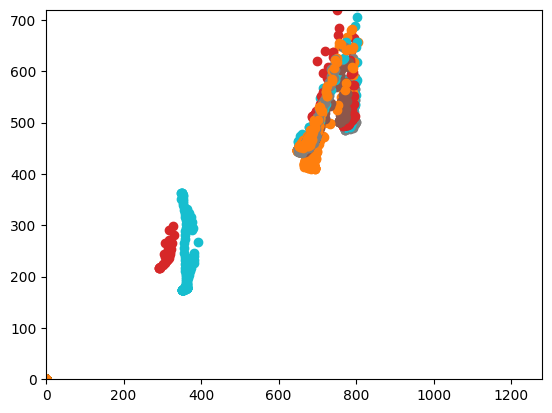

In [63]:
%load_ext autoreload
%autoreload 2
from sl_ai.gesture_classifier import GestureClassifier
from sl_ai.dataset import GestureDataset

gesture_dataset: GestureDataset = GestureDataset()
# gesture_dataset.scan_videos(dataset_location=DATASET_ROOT, handedness_data=handedness_data_from_directory_names(DATASET_ROOT))
# gesture_dataset.analyze_videos(csv_out_path=DATASET_CSV, overwrite=True)

gesture_dataset.load_from_csv(DATASET_CSV, visualize_gestures_ids=[0])

# uploaded_dataset: GestureDataset = GestureDataset()
# uploaded_dataset.load_from_csv(UPLOADED_DATASET_CSV)

# gesture_dataset.append_dataset(uploaded_dataset)

gesture_dataset.summary()

classifier: GestureClassifier = GestureClassifier(gesture_dataset=gesture_dataset)

In [46]:
gesture_dataset.x_data.shape

(175, 400)

In [47]:
gesture_dataset.y_data.shape

(175,)

In [48]:
len(gesture_dataset)

12

In [50]:
classifier.train(train_size=.5)
classifier.summary()

Training model:
Dataset contain 12 gestures.
Epoch 1/1000
87/87 [==============================] - 0s 2ms/step - loss: 2.4844 - sparse_categorical_accuracy: 0.1034 - val_loss: 2.1709 - val_sparse_categorical_accuracy: 0.2727
Epoch 2/1000
87/87 [==============================] - 0s 1ms/step - loss: 2.2547 - sparse_categorical_accuracy: 0.2299 - val_loss: 2.0533 - val_sparse_categorical_accuracy: 0.3182
Epoch 3/1000
87/87 [==============================] - 0s 1ms/step - loss: 2.1256 - sparse_categorical_accuracy: 0.2644 - val_loss: 1.9059 - val_sparse_categorical_accuracy: 0.3409
Epoch 4/1000
87/87 [==============================] - 0s 1ms/step - loss: 1.9165 - sparse_categorical_accuracy: 0.2989 - val_loss: 1.8264 - val_sparse_categorical_accuracy: 0.4318
Epoch 5/1000
87/87 [==============================] - 0s 1ms/step - loss: 1.8189 - sparse_categorical_accuracy: 0.2874 - val_loss: 1.6549 - val_sparse_categorical_accuracy: 0.3864
Epoch 6/1000
87/87 [==============================] - 0

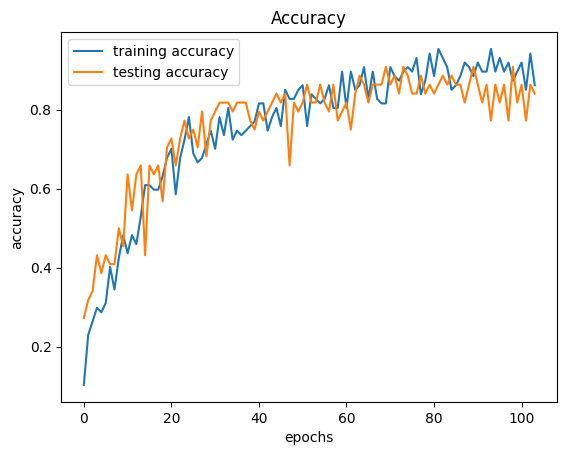

In [51]:
classifier.visualize_accuracy()

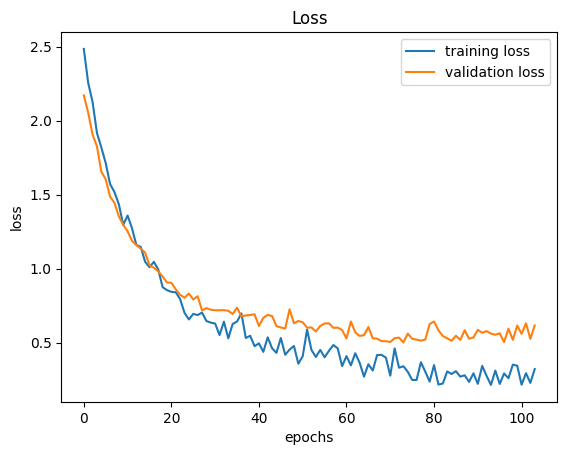

In [52]:
classifier.visualize_loss()

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      1.00      1.00         3
           2       0.80      1.00      0.89         4
           3       1.00      0.75      0.86         4
           4       0.00      0.00      0.00         3
           5       0.50      1.00      0.67         2
           6       1.00      0.25      0.40         4
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         3

    accuracy                           0.84        44
   macro avg       0.83      0.83      0.80        44
weighted avg       0.85      0.84      0.81        44



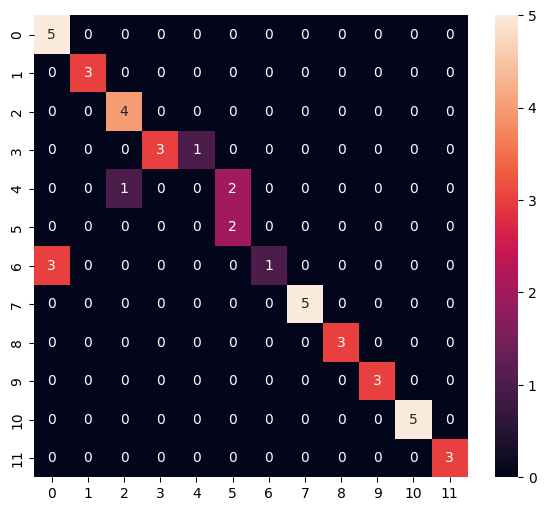

In [53]:
classifier.confusion_matrix()

# Test predictions

In [54]:
from sl_ai.dataset import detect_hands_task, GestureData

video_path = Path('../ai_data/vgt-all/duidelijk_11/duidelijk - 2023-01-04_16-41-21.mp4')
gesture_data = GestureData(name="hello", left_hand=False, right_hand=True)
video_name, (frame_width, frame_height), left_landmarks, right_landmarks = detect_hands_task(gesture_data, video_path)


In [55]:
from sl_ai.dataset import preprocess_landmarks
from copy import deepcopy
left_landmarks_copy = deepcopy(left_landmarks)
right_landmarks_copy = deepcopy(right_landmarks)
preprocess_landmarks(left_landmarks_copy, right_landmarks_copy, None, None)

In [56]:
from sl_ai.dataset import pre_process_point_history_center

for i, landmarks in left_landmarks_copy.items():
    left_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)
for i, landmarks in right_landmarks_copy.items():
    right_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)

In [57]:
result = classifier.predict(left_landmarks_copy, right_landmarks_copy)
classes_x = np.argmax(result, axis=1)
print(classes_x)
prediction_percents = (result*100)
frame = pd.DataFrame(prediction_percents.astype(np.int32))
print(frame)

1/1 [==============================] - 0s 17ms/step
[0]
   0   1   2   3   4   5   6   7   8   9   10  11
0  81   0   0   0   0   0   7  10   0   0   0   0


In [58]:
result

array([[8.12437475e-01, 4.78057563e-03, 1.30846948e-14, 2.54918908e-04,
        1.09432585e-05, 2.51409518e-11, 7.97503814e-02, 1.02592036e-01,
        4.72688771e-06, 2.07656010e-11, 1.68899758e-04, 1.45542270e-13]],
      dtype=float32)

In [59]:
l = np.array(left_landmarks_copy[12], dtype='float32')
r = np.array(right_landmarks_copy[12], dtype='float32')

x_data = np.concatenate((l, r), axis=0)
x_data = x_data.reshape((-1, x_data.shape[0]))
results = classifier.model.predict(x_data, batch_size=1)
classes_x = np.argmax(result, axis=1)
print(classes_x)
prediction_percents = (result*100)
frame = pd.DataFrame(prediction_percents.astype(np.int32))
print(frame)

1/1 [==============================] - 0s 16ms/step
[0]
   0   1   2   3   4   5   6   7   8   9   10  11
0  81   0   0   0   0   0   7  10   0   0   0   0
